In [168]:
#!pip install textblob


In [169]:
import pandas as pd
import numpy as np
import re, string
import pkg_resources
from textblob import TextBlob
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.feature_extraction.text import CountVectorizer


from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


from sklearn.svm import SVC,LinearSVC

import seaborn as sns


from sklearn.feature_selection import SelectKBest, chi2

In [170]:
df = pd.read_csv('../bbc_text.csv')
df = df.sample(frac=0.5).iloc[0:2000]
df

,category,text
41,sport,federer claims dubai crown world number one ro...
1366,tech,broadband in the uk growing fast high-speed ne...
1891,business,german economy rebounds germany s economy the...
2012,entertainment,boogeyman takes box office lead the low-budget...
1745,sport,federer forced to dig deep top seed roger fede...
...,...,...
941,tech,cheaper chip for mobiles a mobile phone chip w...
1943,tech,apple sues to stop product leaks computer firm...
519,politics,no to royal succession shake-up a labour peer ...
698,sport,britain boosted by holmes double athletics fan...


In [171]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

words = stopwords.words('english')


def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = " ".join(punc_removed).split(' ')
    punc_clean = [word for word in punc_removed_join if word not in words]
    return punc_clean


tfidf_vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", norm='l2')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
x = df['category']
print(x)

print(len(x))

41              sport
1366             tech
1891         business
2012    entertainment
1745            sport
            ...      
941              tech
1943             tech
519          politics
698             sport
127             sport
Name: category, Length: 1112, dtype: object
1112


In [172]:
x = df['text']
y = df['category']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [173]:
LR= LogisticRegression()
svc = SVC()


In [174]:
#creating pipeline for logistic regression

LRpipepline1 = Pipeline([
    ('vect', tfidf_vectorizer),
    ('chi', SelectKBest(chi2, k = 6000)),
    ('clf', LogisticRegression(random_state=0))
])

model1 = Lpipepline1.fit(x_train,  y_train)

In [175]:
#creating pipeline for svc
from sklearn.feature_extraction.text import TfidfTransformer
svcpipeline = Pipeline([
    ('bow', tfidf_vectorizer),
    ('tfidf', TfidfTransformer()),
    ('classifier', LinearSVC(C = 6000))
])

model2 = svcpipeline.fit(x_train, y_train)

C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [176]:
predict1 = model1.predict(x_test)
predict2 = model2.predict(x_test)

In [177]:
print(accuracy_score(y_test, predict1))
print(accuracy_score(y_test, predict2))

0.9491017964071856
0.9580838323353293


In [178]:
ytest = np.array(y_test)

In [179]:
from sklearn.metrics import mean_absolute_error

# Convert class labels to numerical values for y_test, predict1, and predict2
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
predict1_numeric = label_encoder.transform(predict1)
predict2_numeric = label_encoder.transform(predict2)

# Calculate mean absolute error for predict1 and predict2
mae1 = mean_absolute_error(y_test_numeric, predict1_numeric)
mae2 = mean_absolute_error(y_test_numeric, predict2_numeric)

print("Mean Absolute Error for predict1:", mae1)
print("Mean Absolute Error for predict2:", mae2)


Mean Absolute Error for predict1: 0.09880239520958084
Mean Absolute Error for predict2: 0.08682634730538923


               precision    recall  f1-score   support

     business       0.92      0.95      0.93        82
entertainment       0.98      0.95      0.96        57
     politics       0.95      0.87      0.91        69
        sport       0.96      1.00      0.98        73
         tech       0.95      0.98      0.96        53

     accuracy                           0.95       334
    macro avg       0.95      0.95      0.95       334
 weighted avg       0.95      0.95      0.95       334



<Axes: >

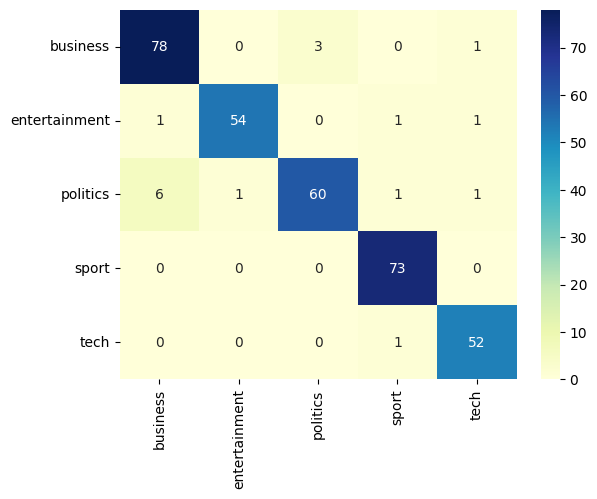

In [180]:
#confusion matrix for LogisticRegression

class_label = ['business', 'entertainment','politics','sport','tech']

print(classification_report(ytest, predict1))

cm = confusion_matrix(ytest,predict1)
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=class_label,
                                 index=class_label)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

               precision    recall  f1-score   support

     business       0.95      0.96      0.96        82
entertainment       0.95      0.96      0.96        57
     politics       0.97      0.90      0.93        69
        sport       0.97      1.00      0.99        73
         tech       0.94      0.96      0.95        53

     accuracy                           0.96       334
    macro avg       0.96      0.96      0.96       334
 weighted avg       0.96      0.96      0.96       334



<Axes: >

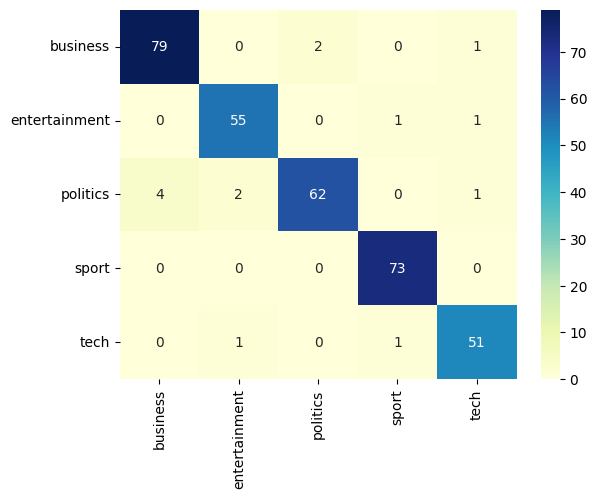

In [181]:
print(classification_report(ytest, predict2))
cm = confusion_matrix(ytest, predict2)

cm_matrix = pd.DataFrame(data = cm, index = class_label, columns=class_label)
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='d')

In [190]:
news = input("Enter a news : ")

news_data = {'predict_news': [news]}

news_df = pd.DataFrame(news_data)

news_df

,predict_news
0,adf


In [192]:
# extract category


# model 1 logistic regression

news_cat = model1.predict(news_df['predict_news'])
print("Category = ", news_cat)

array(['sport'], dtype=object)

In [193]:
# model 2 svc

news_cat = model2.predict(news_df['predict_news'])
print("Category = ", news_cat)

array(['sport'], dtype=object)